In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [60]:
#Load training data
train_data = pd.read_csv("/Users/pankaj/Desktop/titanic/train.csv")
test_data = pd.read_csv("/Users/pankaj/Desktop/titanic/test.csv")


In [61]:
#first 10 data values
train_data.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [62]:
#load test data

test_data.head(10)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [63]:
#find the length of training data and test data

length_trainData = len(train_data)
length_testData = len(test_data)
print(length_trainData)
print(length_testData)

891
418


In [64]:
#check which columns has empty values
scan_Data = [train_data, test_data]
for data in scan_Data:
    print(pd.isnull(data).sum()>0)

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool
PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool


In [65]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


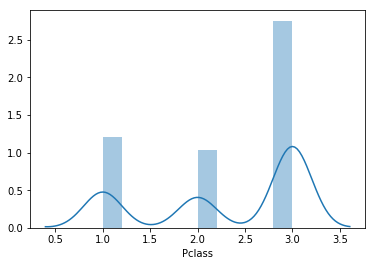

In [9]:
sns.distplot(train_data['Pclass'])

In [10]:
#correlation coefficient, or simply the correlation, is an index that ranges from -1 to 1. 
#When the value is near zero, there is no linear relationship. As the correlation gets closer to plus or minus one, the relationship is stronger. 
#A value of one (or negative one) indicates a perfect linear relationship between two variables.
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [67]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
corr = train_data.corr()


corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '100px', 'font-size': '10pt'})\
    .set_precision(2)\\



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1,-0.005,-0.035,0.037,-0.058,-0.0017,0.013
Survived,-0.005,1,-0.34,-0.077,-0.035,0.082,0.26
Pclass,-0.035,-0.34,1,-0.37,0.083,0.018,-0.55
Age,0.037,-0.077,-0.37,1,-0.31,-0.19,0.096
SibSp,-0.058,-0.035,0.083,-0.31,1,0.41,0.16
Parch,-0.0017,0.082,0.018,-0.19,0.41,1,0.22
Fare,0.013,0.26,-0.55,0.096,0.16,0.22,1


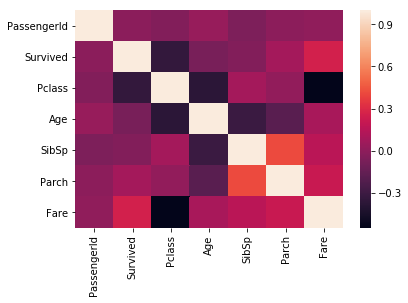

In [12]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [13]:
# change male to 1 and female to 0
gender = {'male':1, 'female':0}
data = [train_data, test_data]
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(gender)
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C


In [14]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent_1 = train_data.isnull().sum()/train_data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)



,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


In [15]:
#substitute some random value for the missing values in age which is near by mean and standard deviation
data = [train_data, test_data]
for dataset in data:
    mean = train_data["Age"].mean()
    std = test_data["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_data["Age"].astype(int)
train_data["Age"].isnull().sum()

0

In [16]:

train_data['Embarked'].describe()


count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [71]:
# Class vs Survived
SurvicedvsClass = train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
print(SurvicedvsClass)

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [18]:
# sex vs Survived
print(train_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))

   Sex  Survived
0    0  0.742038
1    1  0.188908


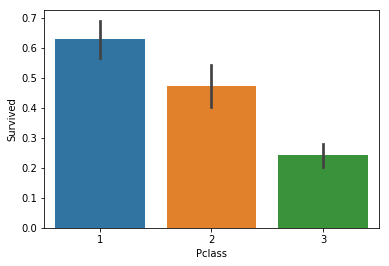

In [73]:
sns.barplot(x='Pclass', y='Survived', data=train_data)

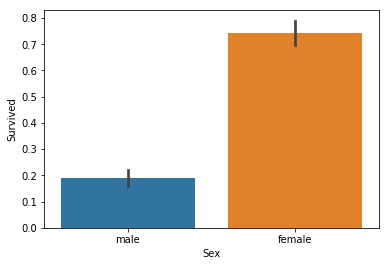

In [74]:
sns.barplot(x='Sex', y='Survived', data=train_data)

In [19]:
common_value = 'S'
data = [train_data, test_data]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)
    
train_data["Embarked"].isnull().sum()

0

In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(1), int64(7), object(4)
memory usage: 83.6+ KB


In [21]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_data, test_data]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,0
5,6,0,3,"Moran, Mr. James",1,28,0,0,330877,8.4583,NaN,2
6,7,0,1,"McCarthy, Mr. Timothy J",1,54,0,0,17463,51.8625,E46,0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2,3,1,349909,21.0750,NaN,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27,0,2,347742,11.1333,NaN,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14,1,0,237736,30.0708,NaN,1


In [22]:
data = [train_data, test_data]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [23]:
#ticket is not required

train_data = train_data.drop(['Ticket'], axis=1)
test_data = test_data.drop(['Ticket'], axis=1)

#deleting name from the dataset as well as cabin
train_data = train_data.drop(['Name'], axis = 1)
test_data = test_data.drop(['Name'], axis = 1)

train_data = train_data.drop(['Cabin'], axis = 1)
test_data = test_data.drop(['Cabin'], axis = 1)

#drop passenger id as it is not required, 
train_data = train_data.drop(['PassengerId'], axis=1)


In [24]:
# data = [train_data, test_data]

# for dataset in data:
#     dataset.loc[ dataset['Fare'] <= 10, 'Fare'] = 0
#     dataset.loc[(dataset['Fare'] > 10) & (dataset['Fare'] <= 20), 'Fare'] = 1
#     dataset.loc[(dataset['Fare'] > 20) & (dataset['Fare'] <= 31), 'Fare']   = 2
#     dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
#     dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
#     dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
#     dataset['Fare'] = dataset['Fare'].astype(int)

In [25]:
train_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7,0
1,1,1,0,38,1,0,71,1
2,1,3,0,26,0,0,7,0
3,1,1,0,35,1,0,53,0
4,0,3,1,35,0,0,8,0
5,0,3,1,28,0,0,8,2
6,0,1,1,54,0,0,51,0
7,0,3,1,2,3,1,21,0
8,1,3,0,27,0,2,11,0
9,1,2,0,14,1,0,30,1


In [26]:
test_data.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,22,0,0,7,2
1,893,3,0,38,1,0,7,0
2,894,2,1,26,0,0,9,2
3,895,3,1,35,0,0,8,0
4,896,3,0,35,1,1,12,0
5,897,3,1,28,0,0,9,0
6,898,3,0,54,0,0,7,2
7,899,2,1,2,1,1,29,0
8,900,3,0,27,0,0,7,1
9,901,3,1,14,2,0,24,0


In [27]:
# apply models

X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]
X_test  = test_data.drop("PassengerId", axis=1).copy()

print(X_train.columns)
print(X_test.columns)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')
Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')
(891, 7)
(891,)
(418, 7)


In [75]:

perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

In [76]:
acc_perceptron

65.88

In [31]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.35

In [32]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

# acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

acc_log

80.25

In [54]:
mlp_perceptron = MLPClassifier(hidden_layer_sizes = (784), max_iter = 1000, alpha = 0.00001, 
                               solver ='lbfgs', verbose=True, random_state=20, tol = 0.00000001, activation ='tanh')
#mlp_perceptron = Perceptron(max_iter=5)
mlp_perceptron.fit(X_train, Y_train)
Y_pred = mlp_perceptron.predict(X_test)
acc_perceptron = round(mlp_perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

#relu - 84.96
#tanh - 96

96.86

In [91]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

acc_random_forest

96.86

In [92]:
submission = pd.DataFrame({
    "PassengerId": test_data['PassengerId'],
    "Survived": Y_pred
})
submission.to_csv("sub.csv", index=False)

In [95]:
predictions = cross_val_predict(mlp_perceptron, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[419, 130],
       [131, 211]])

In [94]:
print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.7294117647058823
Recall: 0.7251461988304093
